# Bonusové zadanie

Meno a priezvisko: Dávid Kromka
AIS ID: 110834
Data: Kaggle Medical MINIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Zvolil som si úlohu číslo 2, klasifikácia obrázkov v Kaggle Medical MINIST. Na deskriptívnu EDA a vytváranie modelu som použil knižnicu tensorflow a pri realizácii zadania som postupoval podľa oficiálnej stránky tensorflow.
Zdroj: https://www.tensorflow.org/tutorials/images/classification

Načítanie priečinka images, ktorý obsahuje jednotlivé triedy (priečinky) s názvom triedy, ktorej snímky obsahuje, napríklad Hand. Vypíše sa celkový počet snímok.

In [2]:
import pathlib

directory = pathlib.Path("images")
dataset = tf.keras.utils.image_dataset_from_directory(directory)

Found 58954 files belonging to 6 classes.


Názvy jednotlivých tried podľa názvu priečinka v ktorom sa nachádzajú.

In [3]:
names = dataset.class_names
print(names)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


Prvá snímka v priečinku Hand. 

Počet snímok: 10000


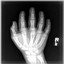

In [4]:
hands = list(directory.glob('Hand/*'))
print(f'Počet snímok: {len(hands)}')
PIL.Image.open(str(hands[0]))

Prvá snímka v triede CXR

Počet snímok: 10000


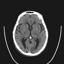

In [5]:
head = list(directory.glob('HeadCT/*'))
print(f'Počet snímok: {len(head)}')
PIL.Image.open(str(head[0]))

Počet snímok: 10000


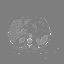

In [6]:
chest = list(directory.glob('ChestCT/*'))
print(f'Počet snímok: {len(chest)}')
PIL.Image.open(str(chest[0]))

Počet snímok: 10000


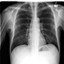

In [7]:
cxr = list(directory.glob('CXR/*'))
print(f'Počet snímok: {len(cxr)}')
PIL.Image.open(str(cxr[0]))

Počet snímok: 8954


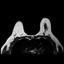

In [8]:
breast = list(directory.glob('BreastMRI/*'))
print(f'Počet snímok: {len(breast)}')
PIL.Image.open(str(breast[0]))

Počet snímok: 10000


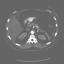

In [9]:
abdomen = list(directory.glob('AbdomenCT/*'))
print(f'Počet snímok: {len(abdomen)}')
PIL.Image.open(str(abdomen[0]))

Počet prvkov jednotlivých tried v kruhovom diagrame.

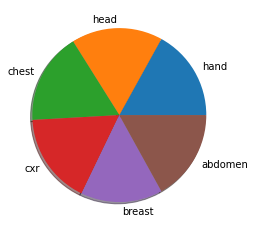

In [10]:
import matplotlib.pyplot as plt 
import numpy as np

arr = np.array([len(hands), len(head), len(chest), len(cxr), len(breast), len(abdomen)])
labels = ['hand', 'head', 'chest', 'cxr', 'breast', 'abdomen']

plt.pie(arr, labels=labels, shadow=True) 
plt.show()

Rozdelenie dát na trénovaciu a testovaciu podmnožinu.

In [11]:
batch_size = 32
img_height = 64
img_width = 64

train sú trénovacie dáta.

In [12]:
train = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58954 files belonging to 6 classes.
Using 47164 files for training.


test sú testovacie dáta.

In [13]:
test = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58954 files belonging to 6 classes.
Using 11790 files for validation.


Názvy jednotlivých tried.

In [14]:
class_names = train.class_names
print(class_names)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


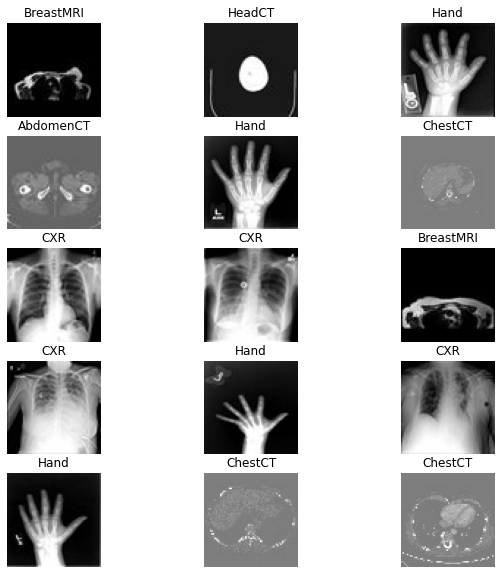

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Batch 32 obrázkov v tvare 64x64x3, kde 3 je kanál farieb. 

In [16]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


Štandardizácia a normalizácia dát.

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

Dáta štandardizujeme na rozmedzie (0, 1).

In [18]:
normalization_layer = layers.Rescaling(1./255)

Vytváranie modelu.

In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Hodnotenie úspešnosti bude vykonané pomocou metódy accuracy.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

Trénovanie modelu.

In [22]:
epochs=10
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/10
1474/1474 [==============================] - 111s 70ms/step - loss: 0.0389 - accuracy: 0.9885 - val_loss: 0.0142 - val_accuracy: 0.9967
Epoch 2/10
1474/1474 [==============================] - 88s 60ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0083 - val_accuracy: 0.9983
Epoch 3/10
1474/1474 [==============================] - 87s 59ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 4/10
1474/1474 [==============================] - 89s 60ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9990
Epoch 5/10
1474/1474 [==============================] - 90s 61ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 6/10
1474/1474 [==============================] - 88s 59ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 7/10
1474/1474 [==============================] - 91s 62ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0119 

Vizualizácia výsledkov nám znázorňuje výsledky predpokladov pre trénovacie dáta a pre testovacie dáta. Prekvapivo, model nie je pretrenovaný a teda nenastáva výrazný overfitting a model nám dokáže klasifikovať s vysokou úspešnosťou aj testovacie dáta.

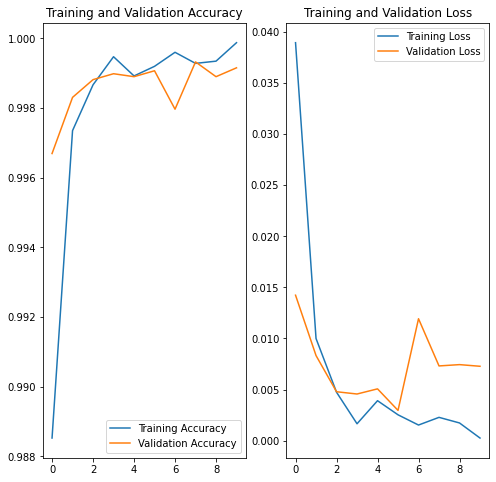

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Chceme vyskúšať, ako sa bude správať model po pridaní šumu. Data augemntation pridá do trenovacej množniny ďalšie snímky, ktoré majú napríklad inú orientáciu ako tie, ktoré sa už medzi dátami nachádzajú.

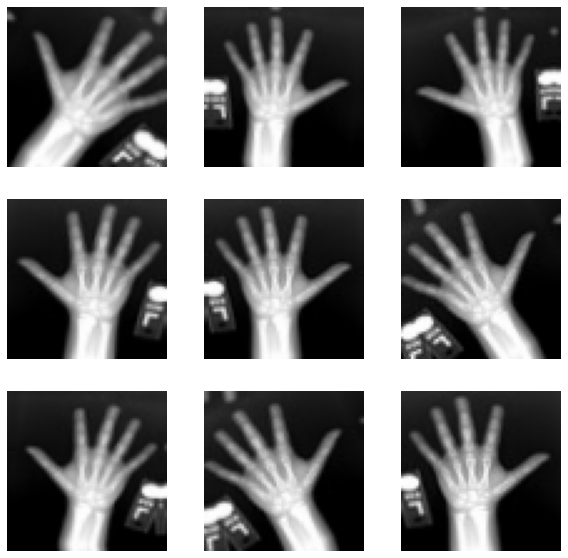

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [28]:
epochs = 15
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/15
1474/1474 [==============================] - 91s 61ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/15
1474/1474 [==============================] - 90s 61ms/step - loss: 4.9341e-04 - accuracy: 0.9998 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 3/15
1474/1474 [==============================] - 89s 61ms/step - loss: 3.0095e-05 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 4/15
1474/1474 [==============================] - 88s 59ms/step - loss: 7.0759e-07 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 5/15
1474/1474 [==============================] - 87s 59ms/step - loss: 2.5753e-07 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 6/15
1474/1474 [==============================] - 87s 59ms/step - loss: 1.2771e-07 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 7/15
1474/1474 [==============================] - 88s 60ms/step - loss: 6.3531e-08 - accuracy: 1.0

Po pridaní šumu sú výsledky lepšie ako v predchadzajúcom prípade o niekoľko tisícin. Výsledky predpovedí na trenovacej množine naznačujú, že model je pretrenovaný, no dáva vynikajúce výslekdy aj pre testovaciu časť.

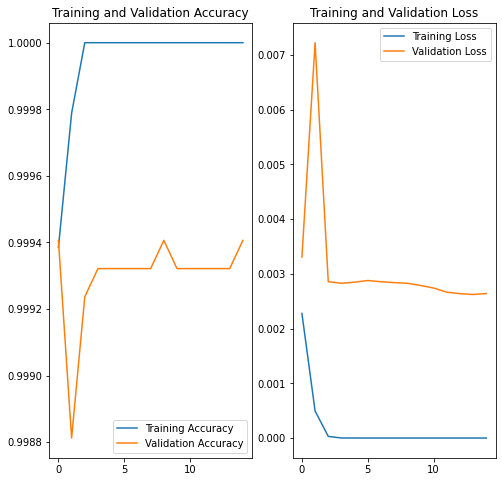

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prišli sme k záveru, že bez pridania šumu aj s ním sú výsledky modelu veľmi dobré, modely dokážu klasifikovať testovacie snímky s presnosťou vyše 99%.